In [46]:
#Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [47]:
# The file path
file_path = "/Users/neilbaride/Classwork/Project 2- Vehicle Loan/train.csv"

# Read DataFrame
df = pd.read_csv(file_path)

In [48]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  ...  \
0               45                1441    01-01-1984        Salaried  ...   
1               45                1502    31-07-1985   Self employed  ...   
2               45                1497    24-08-1985   Self employed  ...   
3               45                1501    30-12-1993   Self employed  ...   
4               45                1495    09-12-1977   Self employed  ...   

  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  

In [49]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
            UNIQUEID  DISBURSED_AMOUNT    ASSET_COST            LTV  \
count  233154.000000     233154.000000  2.331540e+05  233154.000000   
mean   535917.573376      54356.993528  7.586507e+04      74.746530   
std     68315.693711      12971.314171  1.894478e+04      11.456636   
min    417428.000000      13320.000000  3.700000e+04      10.030000   
25%    476786.250000      47145.000000  6.571700e+04      68.880000   
50%    535978.500000      53803.000000  7.094600e+04      76.800000   
75%    595039.750000      60413.000000  7.920175e+04      83.670000   
max    671084.000000     990572.000000  1.628992e+06      95.000000   

           BRANCH_ID    SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID  \
count  233154.000000  233154.000000    233154.000000       233154.000000   
mean       72.936094   19638.635035        69.028054         3396.880247   
std        69.834995    3491.949566        22.141304         2238.147502   
min         1

In [50]:
# Display missing values:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCT

In [51]:
# Display information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 no

In [52]:
# Display the 'DATE_OF_BIRTH' column
print("Date of Birth column:")
print(df['DATE_OF_BIRTH'])

Date of Birth column:
0         01-01-1984
1         31-07-1985
2         24-08-1985
3         30-12-1993
4         09-12-1977
             ...    
233149    01-08-1988
233150    05-12-1988
233151    01-06-1976
233152    26-03-1994
233153    18-02-1984
Name: DATE_OF_BIRTH, Length: 233154, dtype: object


In [53]:
# Convert 'DATE_OF_BIRTH' to datetime
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')

# Calculate age by subtracting 'DATE_OF_BIRTH' from the current date
current_date = pd.to_datetime('today')
df['AGE'] = (current_date - df['DATE_OF_BIRTH']).dt.days // 365

# Display both 'DATE_OF_BIRTH' and 'AGE' columns
print("\nDataFrame with Date of Birth and Age:")
print(df[['DATE_OF_BIRTH', 'AGE']])

# Save the DataFrame with the new 'AGE' column
df.to_csv("/Users/neilbaride/Classwork/Project 2- Vehicle Loan/train_with_age.csv", index=False)



DataFrame with Date of Birth and Age:
       DATE_OF_BIRTH  AGE
0         1984-01-01   40
1         1985-07-31   38
2         1985-08-24   38
3         1993-12-30   30
4         1977-12-09   46
...              ...  ...
233149    1988-08-01   35
233150    1988-12-05   35
233151    1976-06-01   47
233152    1994-03-26   29
233153    1984-02-18   39

[233154 rows x 2 columns]


In [54]:
# Calculate the difference between 'DISBURSED_AMOUNT' and 'ASSET_COST'
df['AMOUNT_COST_DIFF'] = df['DISBURSED_AMOUNT'] - df['ASSET_COST']

# Display the DataFrame with the new 'AMOUNT_COST_DIFF' column
print("\nDataFrame with Amount Cost Difference:")
print(df[[ 'DISBURSED_AMOUNT', 'ASSET_COST', 'AMOUNT_COST_DIFF']])



DataFrame with Amount Cost Difference:
        DISBURSED_AMOUNT  ASSET_COST  AMOUNT_COST_DIFF
0                  50578       58400             -7822
1                  47145       65550            -18405
2                  53278       61360             -8082
3                  57513       66113             -8600
4                  52378       60300             -7922
...                  ...         ...               ...
233149             63213      105405            -42192
233150             73651      100600            -26949
233151             33484       71212            -37728
233152             34259       73286            -39027
233153             75751      116009            -40258

[233154 rows x 3 columns]


In [55]:

# Select features and target variable
features = df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID','CURRENT_PINCODE_ID',
               'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
               'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
               'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
               'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
               'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
               'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES']]

target = df['LOAN_DEFAULT']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
5829/5829 [==============================] - 10s 2ms/step - loss: 0.5095 - accuracy: 0.7825 - val_loss: 0.5074 - val_accuracy: 0.7823
Epoch 2/10
5829/5829 [==============================] - 10s 2ms/step - loss: 0.5054 - accuracy: 0.7830 - val_loss: 0.5055 - val_accuracy: 0.7824
Epoch 3/10
5829/5829 [==============================] - 8s 1ms/step - loss: 0.5039 - accuracy: 0.7832 - val_loss: 0.5053 - val_accuracy: 0.7821
Epoch 4/10
5829/5829 [==============================] - 8s 1ms/step - loss: 0.5034 - accuracy: 0.7833 - val_loss: 0.5047 - val_accuracy: 0.7824
Epoch 5/10
5829/5829 [==============================] - 8s 1ms/step - loss: 0.5024 - accuracy: 0.7832 - val_loss: 0.5040 - val_accuracy: 0.7825
Epoch 6/10
5829/5829 [==============================] - 8s 1ms/step - loss: 0.5020 - accuracy: 0.7834 - val_loss: 0.5037 - val_accuracy: 0.7828
Epoch 7/10
5829/5829 [==============================] - 8s 1ms/step - loss: 0.5012 - accuracy: 0.7835 - val_loss: 0.5043 - val_accurac

In [56]:

y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("LOAN_DEFAULT:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("Confusion Matrix:")
print(conf_matrix)

1458/1458 [==============================] - 1s 799us/step
LOAN_DEFAULT:
Accuracy: 0.7823765306341275
Precision: 0.5071428571428571
Recall: 0.02097695489462281
Confusion Matrix:
[[36270   207]
 [ 9941   213]]


In [57]:

y_true = y_test  
y_pred = model.predict(X_test_scaled) > 0.5  

# Print the classification report
print("Classification Report for LOAN_DEFAULT:")
print(classification_report(y_true, y_pred))


1458/1458 [==============================] - 1s 754us/step
Classification Report for LOAN_DEFAULT:
              precision    recall  f1-score   support

           0       0.78      0.99      0.88     36477
           1       0.51      0.02      0.04     10154

    accuracy                           0.78     46631
   macro avg       0.65      0.51      0.46     46631
weighted avg       0.72      0.78      0.70     46631



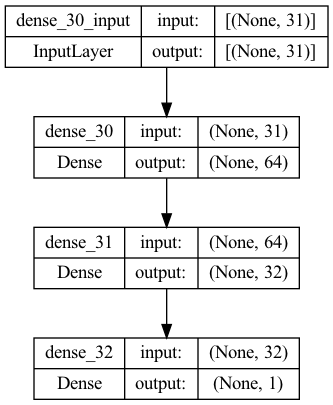

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/10
5829/5829 [==============================] - 9s 2ms/step - loss: -445627.7500 - accuracy: 0.9810 - val_loss: -426738.8438 - val_accuracy: 0.9799
Epoch 2/10
5829/5829 [==============================] - 9s 2ms/step - loss: -575229.8750 - accuracy: 0.9812 - val_loss: -543575.5625 - val_accuracy: 0.9807
Epoch 3/10
5829/5829 [==============================] - 9s 2ms/step - loss: -728028.0625 - accuracy: 0.9806 - val_loss: -687804.8750 - val_accuracy: 0.9820
Epoch 4/10
5829/5829 [==============================] - 9s 1ms/step - loss: -897087.8125 - accuracy: 0.9812 - val_loss: -835036.4375 - val_accuracy: 0.9813
Epoch 5/10
5829/5829 [==============================] - 9s 1ms/step - loss: -1101742.6250 - accuracy: 0.9808 - val_loss: -1027267.6250 - val_accuracy: 0.9825
Epoch 6/10
5829/5829 [==============================] - 7s 1ms/step - loss: -1318624.1250 - accuracy: 0.9815 - val_loss: -1207425.2500 - val_accuracy: 0.9815
Epoch 7/10
5829/5829 [==============================] - 7s 1

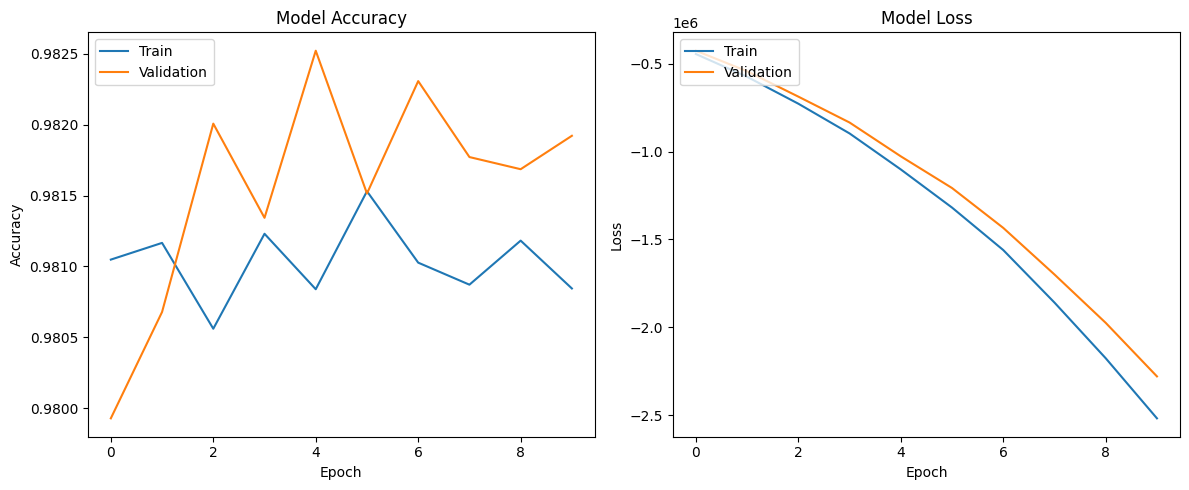

In [74]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
